In [1]:
import json
#Load in cookie
cookies = json.load(open('21-10-15_instagram_data_960_2.json', 'rb'))
#리스트에 담긴 text 하나로 합치기
texts = sum(cookies['text'], [])

In [2]:
import re
#정규식으로 불필요한 문자 제거
newtexts = ''
for text in texts:
    text = text = re.sub('[0-9]+', '', text)
    text = re.sub('[A-Za-z]+', '', text)
    newtext = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]', '', text)
    newtexts += newtext

In [12]:
import nltk
import matplotlib.pyplot as plt
from konlpy.tag import Okt
okt = Okt()
text_list = okt.nouns(newtexts) #명사추출
# text_ph = okt.phrases(newtexts) #어절 추출
# text_mo = okt.morphs(newtexts) #형태소단위 추출
# morphs = nltk.Text(tokens=text_mo)
# print(morphs)
# nouns = nltk.Text(tokens=text_list)
# print(nouns)

In [14]:
from collections import Counter
#단어 개수 세기
count = Counter(text_list)
print(count)

Counter({'거리': 761, '위치': 375, '스스': 151, '작업': 138, '시간': 124, '연극': 108, '스토리': 106, '오늘': 103, '예약': 95, '공연': 89, '이야기': 88, '준비': 87, '대학로': 86, '라이브러리': 85, '기록': 85, '스스러': 84, '배우': 83, '시작': 79, '진행': 74, '작가': 74, '프로필': 67, '링크': 67, '메뉴': 66, '공간': 63, '생각': 62, '이번': 61, '오후': 56, '사람': 56, '마지막': 56, '체험': 55, '보고': 54, '잡지': 53, '작품': 52, '방문': 51, '하나': 50, '내일': 48, '마음': 48, '재료': 47, '수업': 47, '그림': 46, '우리': 45, '무료': 44, '분': 44, '가지': 43, '사진': 43, '수': 42, '이용': 40, '정말': 40, '케이크': 39, '문의': 37, '주문': 37, '클릭': 36, '친구': 36, '쿠키': 36, '월': 35, '신청': 35, '지금': 35, '아이': 35, '더': 34, '처음': 34, '혜화역': 33, '스라': 33, '다른': 33, '하루': 33, '한번': 32, '풍경': 32, '뮤지컬': 32, '위해': 32, '오픈': 31, '주말': 30, '다시': 30, '프로그램': 30, '도구': 30, '마로니에': 30, '모두': 29, '모습': 29, '것': 28, '일': 28, '캐릭터': 28, '소개': 27, '바로': 27, '선물': 27, '만들기': 26, '출구': 26, '콘텐츠': 26, '재미': 26, '관심': 26, '진짜': 26, '직접': 26, '카카오': 26, '참여': 25, '저녁': 25, '여름': 25, '영화': 25, '선생님': 25, '사랑': 24, '종로구': 2

In [16]:
#count로 빈도수 카운트한 단어 for문 돌려서 사전형태로 만들기
words = dict()
#명사 빈도가 높은 n개 추출.most_common(n)
noun_list = count.most_common(30)
for nouns, counts in noun_list:
    if len(nouns) > 1:
        words[nouns] = counts
    
# words = morphs.vocab().most_common(960) #빈도수 상위 960개 추림
# print(words)

In [26]:
print(words)

{'거리': 761, '위치': 375, '스스': 151, '작업': 138, '시간': 124, '연극': 108, '스토리': 106, '오늘': 103, '예약': 95, '공연': 89, '이야기': 88, '준비': 87, '대학로': 86, '라이브러리': 85, '기록': 85, '스스러': 84, '배우': 83, '시작': 79, '진행': 74, '작가': 74, '프로필': 67, '링크': 67, '메뉴': 66, '공간': 63, '생각': 62, '이번': 61, '오후': 56, '사람': 56, '마지막': 56, '체험': 55}


In [19]:
#한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=font_name)

['거리', '위치', '스스', '작업', '시간', '연극', '스토리', '오늘', '예약', '공연', '이야기', '준비', '대학로', '라이브러리', '기록', '스스러', '배우', '시작', '진행', '작가', '프로필', '링크', '메뉴', '공간', '생각', '이번', '오후', '사람', '마지막', '체험']


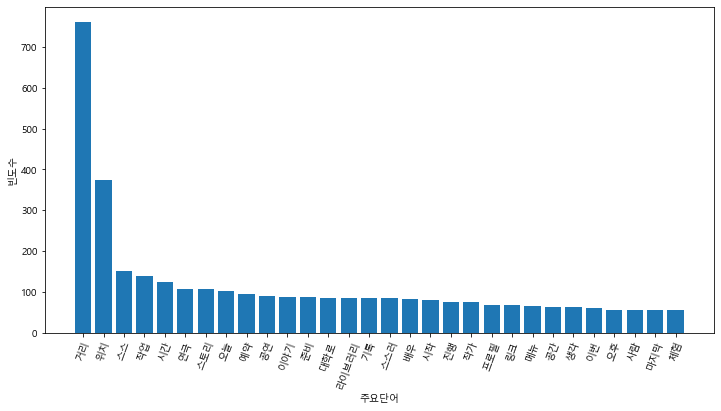

In [27]:
#그래프 사이즈 지정
plt.figure(figsize=(12, 6))
#x,y축 네이밍
plt.xlabel('주요단어')
plt.ylabel('빈도수')
#그래프에 그리드 그리기
# plt.grid(True)
#사전의 값 정렬
Sorted_Dict_Values = sorted(words.values(), reverse=True)
#사전의 키 정렬
Sorted_Dict_Keys = sorted(words, key=words.get, reverse=True)

#bar그래프 그리기
plt.bar(range(len(words)), Sorted_Dict_Values, align='center')
plt.xticks(range(len(words)), list(Sorted_Dict_Keys), rotation='70')

plt.show()